<a href="https://colab.research.google.com/github/boziks9/CL_Project-1/blob/main/%D0%A1%D1%80%D0%B0%D0%B2%D0%BD%D0%B8%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D1%8B%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%BB%D0%B5%D0%BA%D1%81%D0%B8%D0%BA%D0%BE_%D1%81%D1%82%D0%B8%D0%BB%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D1%85_%D0%BE%D1%81%D0%BE%D0%B1%D0%B5%D0%BD%D0%BD%D0%BE%D1%81%D1%82%D0%B5%D0%B9_%D0%BF%D0%B5%D1%80%D0%B5%D0%B2%D0%BE%D0%B4%D0%BE%D0%B2_%D1%80%D0%BE%D0%BC%D0%B0%D0%BD%D0%B0_%22Catcher_in_the_Rye%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install pymorphy3

In [9]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import random
import pandas as pd
import plotly.express as px
from sklearn.feature_extraction.text import TfidfVectorizer
from pymorphy3 import MorphAnalyzer

# Загрузка ресурсов NLTK
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

# Инициализация морфологического анализатора для русского языка
morph = MorphAnalyzer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
# Дополнительные стоп-слова для русского языка (некоторые добавлены уже после получения результатов для более точного отображения)
additional_stopwords = {
    'это', 'весь', 'который', 'мочь','свой', 'такой', 'какой', 'наш', 'ваш', 'их', 'его', 'её', 'ихний',
    'себя', 'себе', 'тебя', 'тебе', 'вас', 'нам', 'вам', 'ими', 'ними', 'него', 'неё', 'них',
    'тут', 'там', 'здесь', 'где', 'когда', 'как', 'что', 'кто', 'почему', 'потому', 'чтобы',
    'или', 'и', 'но', 'да', 'нет', 'же', 'бы', 'ли', 'либо', 'нибудь', 'как-то', 'что-то', 'фиби','сэлли', 'салли','джейн','экли', 'стрэдлейтер'
}

# Объединение стоп-слов из NLTK и дополнительных
stop_words = set(stopwords.words('russian')).union(additional_stopwords)

In [11]:
# Функция для загрузки текста из файла
def load_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

# Функция очистки и нормализации текста
def clean_text(text):
    words = word_tokenize(text.lower())
    words = [word for word in words if word.isalpha()]
    words = [word for word in words if word not in stop_words]
    filtered_words = [morph.parse(word)[0].normal_form for word in words if morph.parse(word)[0].tag.POS not in {'PREP', 'CONJ', 'PRCL', 'NUMR', 'NPRO'}]
    return filtered_words

# Предобработка текста
def preprocess_text(text):
    words = clean_text(text)
    sentences = sent_tokenize(text)
    return words, sentences

# Загрузка и предобработка текстов
text1 = load_text('translation1.txt')
text2 = load_text('translation2.txt')
words1, sentences1 = preprocess_text(text1)
words2, sentences2 = preprocess_text(text2)

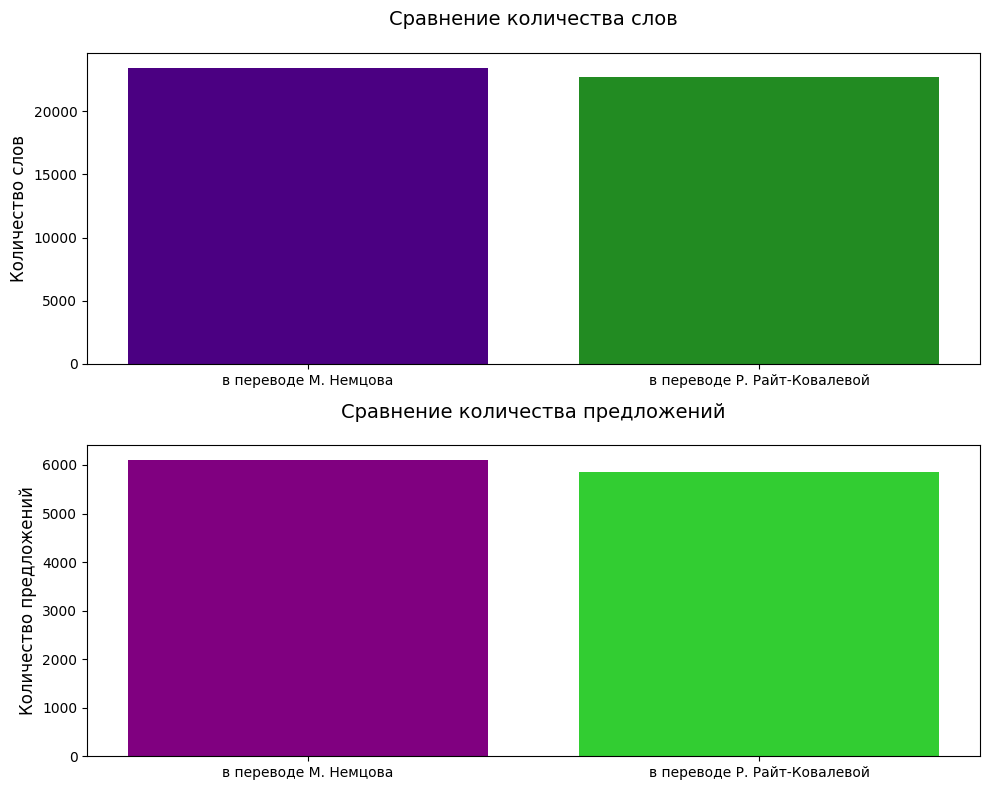

In [18]:
# Сравнение лексических характеристик
def compare_lexical_features(words1, words2, sentences1, sentences2):
    stats = {
        'Слова Немцов': len(words1),
        'Слова Райт-Ковалева': len(words2),
        'Предложения Немцов': len(sentences1),
        'Предложения Райт-Ковалева': len(sentences2)
    }

    fig, ax = plt.subplots(2, 1, figsize=(10, 8))
    ax[0].bar(['в переводе М. Немцова', 'в переводе Р. Райт-Ковалевой'], [stats['Слова Немцов'], stats['Слова Райт-Ковалева']], color=['#4B0082', '#228B22'])
    ax[0].set_title('Сравнение количества слов', pad=20, fontsize=14)
    ax[0].set_ylabel('Количество слов', fontsize=12)

    ax[1].bar(['в переводе М. Немцова', 'в переводе Р. Райт-Ковалевой'], [stats['Предложения Немцов'], stats['Предложения Райт-Ковалева']], color=['#800080', '#32CD32'])
    ax[1].set_title('Сравнение количества предложений', pad=20, fontsize=14)
    ax[1].set_ylabel('Количество предложений', fontsize=12)

    plt.tight_layout()
    plt.show()

compare_lexical_features(words1, words2, sentences1, sentences2)

In [21]:
# Функция для анализа ключевых слов с использованием TF-IDF (без стоп-слов)
def analyze_keywords_without_stopwords(text1, text2):
    # Преобразуем множество стоп-слов в список
    stop_words_list = list(stop_words)

    # Инициализация TfidfVectorizer с учетом стоп-слов
    vectorizer = TfidfVectorizer(stop_words=stop_words_list)
    tfidf_matrix = vectorizer.fit_transform([text1, text2])

    # Получаем слова и их TF-IDF значения
    feature_names = vectorizer.get_feature_names_out()
    tfidf_scores1 = tfidf_matrix[0].toarray().flatten()
    tfidf_scores2 = tfidf_matrix[1].toarray().flatten()

    # Создание DataFrame
    df = pd.DataFrame({
        'Слово': feature_names,
        'TF-IDF (Немцов)': tfidf_scores1,
        'TF-IDF (Райт-Ковалева)': tfidf_scores2
    })

    # Выбор топ-10 слов для каждого перевода
    top_words1 = df.nlargest(10, 'TF-IDF (Немцов)')
    top_words2 = df.nlargest(10, 'TF-IDF (Райт-Ковалева)')

    # Визуализация
    fig = px.bar(pd.concat([top_words1, top_words2]), x='Слово', y=['TF-IDF (Немцов)', 'TF-IDF (Райт-Ковалева)'],
                 barmode='group',
                 color_discrete_map={'TF-IDF (Немцов)': '#4B0082', 'TF-IDF (Райт-Ковалева)': '#228B22'},
                 title='Топ-10 ключевых слов по TF-IDF',
                 labels={'value': 'TF-IDF', 'Слово': 'Слово'},
                 height=600)
    fig.update_layout(xaxis_tickangle=-45,
                    legend_title_text='Переводчик',
                    font=dict(size=12))
    fig.show()

# Вызов функции для анализа ключевых слов
analyze_keywords_without_stopwords(text1, text2)

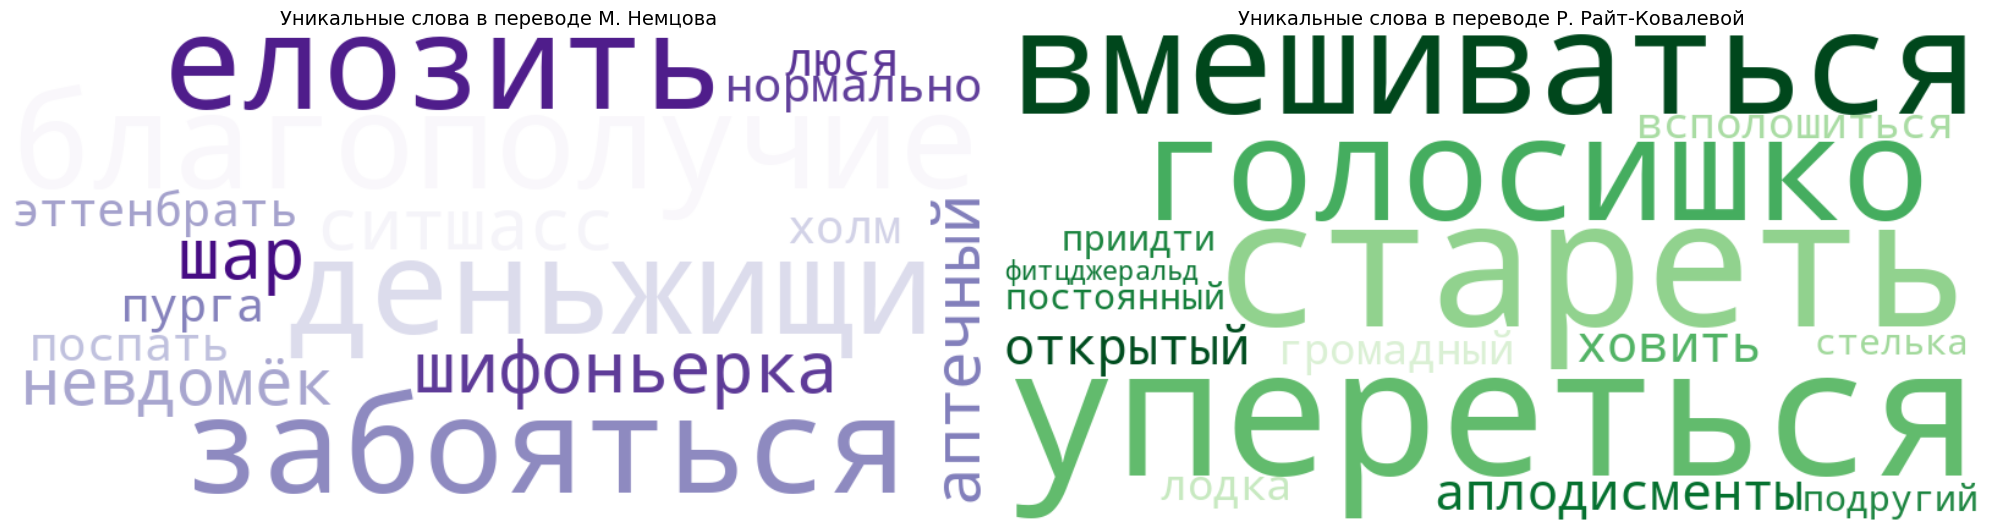

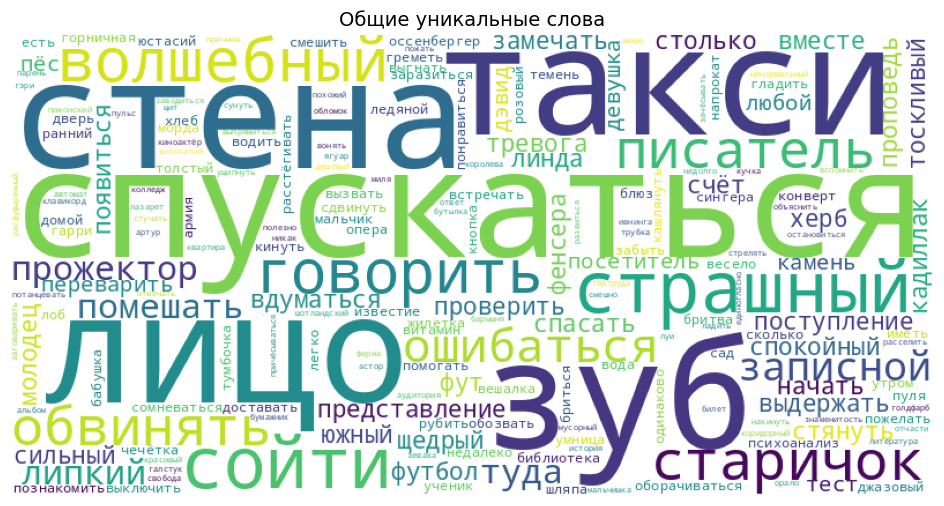

In [36]:
# Анализ уникальных слов
def analyze_unique_words(words1, words2):
    unique1 = set(words1) - set(words2)
    unique2 = set(words2) - set(words1)

    wc1 = WordCloud(width=800, height=400, background_color='white', colormap='Purples').generate(' '.join(random.sample(list(unique1), min(15, len(unique1)))))
    wc2 = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(' '.join(random.sample(list(unique2), min(15, len(unique2)))))

    fig, ax = plt.subplots(1, 2, figsize=(20, 8))
    ax[0].imshow(wc1, interpolation='bilinear')
    ax[0].set_title('Уникальные слова в переводе М. Немцова', fontsize=14)
    ax[0].axis('off')

    ax[1].imshow(wc2, interpolation='bilinear')
    ax[1].set_title('Уникальные слова в переводе Р. Райт-Ковалевой', fontsize=14)
    ax[1].axis('off')

    plt.tight_layout()
    plt.show()

analyze_unique_words(words1, words2)

# Анализ пересечений
def check_intersection(words1, words2):
    common = set(words1) & set(words2)
    if common:
        wc = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(' '.join(common))
        plt.figure(figsize=(12, 6))
        plt.imshow(wc)
        plt.axis('off')
        plt.title('Общие уникальные слова', fontsize=14)
        plt.show()
    else:
        print("Пересечений нет")

check_intersection(words1, words2)

In [25]:
# Функция для анализа частотности слов (только существительные)
def frequency_analysis(words1, words2):
    def filter_nouns(words):
        return [word for word in words if morph.parse(word)[0].tag.POS == 'NOUN']

    filtered_words1 = [word for word in words1 if word not in stop_words]
    filtered_words2 = [word for word in words2 if word not in stop_words]

    nouns1 = filter_nouns(filtered_words1)
    nouns2 = filter_nouns(filtered_words2)

    freq1 = Counter(nouns1)
    freq2 = Counter(nouns2)

    top_words1 = [word for word, _ in freq1.most_common(15)]
    top_words2 = [word for word, _ in freq2.most_common(15)]

    df = pd.DataFrame({
        'Слово': top_words1 + top_words2,
        'Частота': [freq1.get(word, 0) for word in top_words1] + [freq2.get(word, 0) for word in top_words2],
        'Перевод': ['Немцов'] * 15 + ['Райт-Ковалева'] * 15
    })

    fig = px.bar(df, x='Слово', y='Частота', color='Перевод',
                 barmode='group',
                 color_discrete_map={'Немцов': '#4B0082', 'Райт-Ковалева': '#228B22'},
                 title='Топ-15 самых частотных существительных',
                 labels={'Частота': 'Частота употребления', 'Слово': 'Слово'},
                 height=600)
    fig.update_layout(xaxis_tickangle=-45,
                    legend_title_text='Переводчик',
                    font=dict(size=12))
    fig.show()

    return df, freq1, freq2

df, freq1, freq2 = frequency_analysis(words1, words2)

print("Сводная таблица топ-15 существительных (без стоп-слов):")
print(df)

Сводная таблица топ-15 существительных (без стоп-слов):
       Слово  Частота        Перевод
0      время      115         Немцов
1      смысл      101         Немцов
2      девка       77         Немцов
3       рука       75         Немцов
4    комната       67         Немцов
5     парень       56         Немцов
6      фигня       56         Немцов
7       фига       54         Немцов
8      нахер       54         Немцов
9        год       53         Немцов
10   кровать       53         Немцов
11       дом       51         Немцов
12      дело       46         Немцов
13      кино       45         Немцов
14       гад       43         Немцов
15     слово      106  Райт-Ковалева
16     черта      105  Райт-Ковалева
17     время       84  Райт-Ковалева
18   человек       79  Райт-Ковалева
19      рука       77  Райт-Ковалева
20       год       64  Райт-Ковалева
21     школа       63  Райт-Ковалева
22   комната       62  Райт-Ковалева
23      дело       58  Райт-Ковалева
24    голова       

Лексическое разнообразие (Немцов): 0.22
Лексическое разнообразие (Райт-Ковалева): 0.20


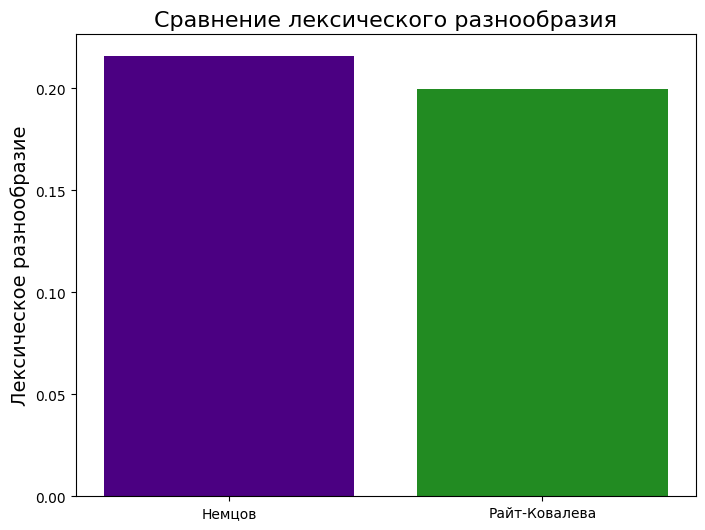

In [37]:
# Функция для анализа лексического разнообразия
def analyze_lexical_diversity(words1, words2):
    diversity1 = len(set(words1)) / len(words1)
    diversity2 = len(set(words2)) / len(words2)

    print(f"Лексическое разнообразие (Немцов): {diversity1:.2f}")
    print(f"Лексическое разнообразие (Райт-Ковалева): {diversity2:.2f}")

    # Визуализация
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.bar(['Немцов', 'Райт-Ковалева'], [diversity1, diversity2], color=['#4B0082', '#228B22'])
    ax.set_title('Сравнение лексического разнообразия', fontsize=16)
    ax.set_ylabel('Лексическое разнообразие', fontsize=14)
    plt.show()

# Вызов функции для анализа лексического разнообразия
analyze_lexical_diversity(words1, words2)